### Homework 4 - Tollan Berhanu
### **Handwritten Digit Classification using Fully-Connected Neural Networks**

- View it in Google Colab here:
https://colab.research.google.com/drive/1zTYlmU6Q8Fg0E6YY9BYPe1ZpiMqmLRSo?usp=sharing

---

### 1 - Install and Import required dependencies

In [1]:
# !pip install --upgrade --quiet pip matplotlib scikit-learn tensorflow keras

In [2]:
# Import required dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
import keras
keras.__version__ # Using version 3.6.0

/Users/tollanberhanu/Library/CloudStorage/OneDrive-UniversityofIdaho/Coursework/github-sync/Deep Learning/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


'3.6.0'

### 2 - Load and Normalize the *MNIST Handwritten Digits* dataset

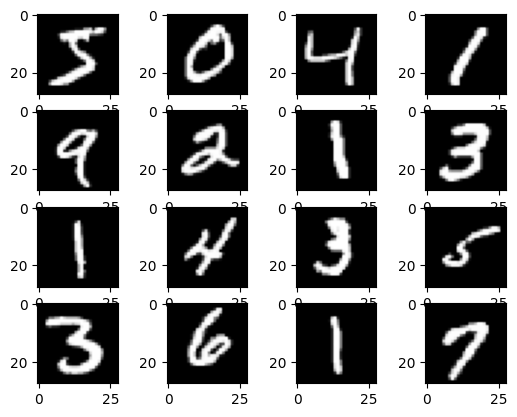

First 5 target values of training set:
 [5 0 4 1 9]

The corresponding one-hot vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [3]:
# Load the MNIST Handwritten Digits dataset from keras.datasets 
def load_digits(show_sample = True):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    # Display the first 16 images in the dataset
    if show_sample == True:
        nImg = 4
        for i in range(nImg*nImg):
            plt.subplot(nImg, nImg, i+1)
            plt.imshow(x_train[i], cmap = 'Greys_r')
        plt.show()
    
    # Transform the (28 x 28) images to (784 x 1) vectors
    x_train_1 = np.reshape(x_train, [x_train.shape[0], x_train.shape[1] * x_train.shape[2]])
    x_test_1 = np.reshape(x_test, [x_test.shape[0], x_test.shape[1] * x_test.shape[2]])
    
    return x_train_1, y_train, x_test_1, y_test

x_train_flat, y_train, x_test_flat, y_test = load_digits()

# Generate the one-hot vector for the training targets
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

print('First 5 target values of training set:\n', y_train[:5])
print('\nThe corresponding one-hot vectors:\n', y_train_onehot[:5])

#### **Normalize the dataset**

In [4]:
# Data Normalization
x_train_norm = x_train_flat / 255
x_test_norm = x_test_flat / 255

print('Training set: {}  |   Training Targets: {}'.format(x_train_norm.shape, y_train.shape))
print('Test set: {}      |   Test targets: {}'.format(x_test_norm.shape, y_test.shape))

Training set: (60000, 784)  |   Training Targets: (60000,)
Test set: (10000, 784)      |   Test targets: (10000,)


### 3 - Build the Fully Connected Neural Network using Keras

In [5]:
# Build the fully connected Neural Network
model = models.Sequential()

# 1st Hidden Layer
model.add(layers.Dense(units=500,
                       activation='relu'))
# 2nd Hidden Layer
model.add(layers.Dense(units=250,
                    #    input_dim = 500,
                       activation='relu'))
# 3rd Hidden Layer
model.add(layers.Dense(units=100,
                    #    input_dim = 250,
                       activation='relu'))
# Output layer
model.add(layers.Dense(units=10,
                    #    input_dim = 100,
                       activation='softmax'))

### 4 - Train the Neural Network

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy')

# Train the model and store the loss history
history = model.fit(x_train_norm, y_train_onehot, epochs=20, batch_size=120, validation_split=0.2)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4691 - val_loss: 0.1225
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0968 - val_loss: 0.0944
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0587 - val_loss: 0.0883
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0392 - val_loss: 0.0841
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0287 - val_loss: 0.0903
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0227 - val_loss: 0.0867
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0229 - val_loss: 0.0895
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0196 - val_loss: 0.1024
Epoch 9/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0172 - val_loss: 0.1029
Epoch 10/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0141 - val_loss: 0.1166
Epoch 11/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0147 - val_loss: 0.1024
Epoch 12/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

- **Plot the Training & Validation Loss**

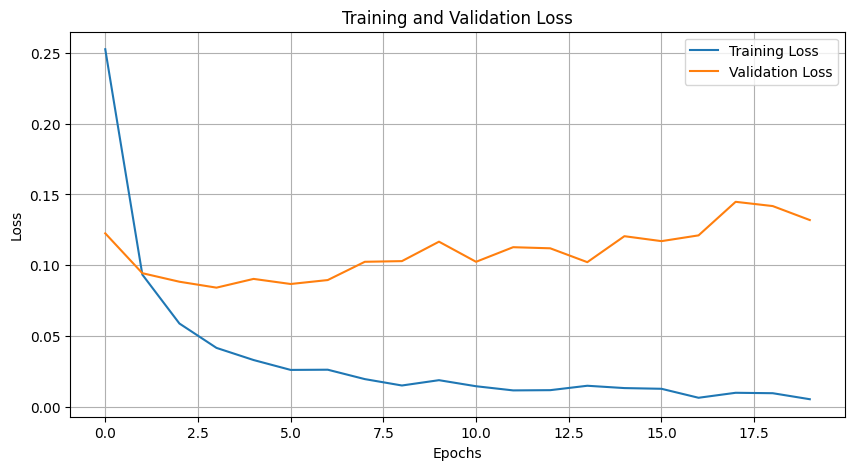

In [7]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### 5 - Evaluate the Neural Network

- **Calculate Training Error Rate**

In [8]:
# Predict the class labels for training data
y_train_pred_onehot = model.predict(x_train_norm)
y_train_pred = np.argmax(y_train_pred_onehot, axis=1)

# Calculate training error rate
train_err = np.sum(y_train != y_train_pred) / y_train.shape[0]

print('Training error rate:', train_err * 100, '%')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step
Training error rate: 0.7166666666666667 %


- **Calculate Test Error Rate**

In [9]:
# True class labels for the test data
y_test_true = np.argmax(y_test_onehot, axis=1)

# Predict the class labels for test data
y_test_pred_onehot = model.predict(x_test_norm)
y_test_pred = np.argmax(y_test_pred_onehot, axis=1)

# Calculate test error rate
test_err = np.sum(y_test != y_test_pred) / y_test.shape[0]

print('Test error rate:', test_err * 100, '%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
Test error rate: 2.06 %


- **Compute and Plot the Confusion Matrix**

<Figure size 1000x1000 with 0 Axes>

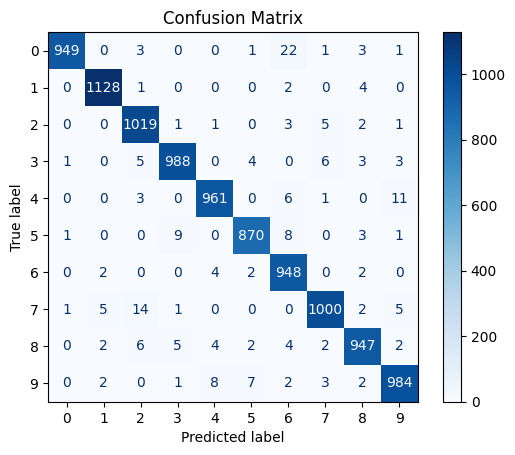

In [10]:
# Compute the confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()